In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('2015_trip_data.csv')

In [3]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


In [4]:
df['startday'] = [pd.to_datetime(x).dayofweek for x in df.stoptime]
df['stopday'] = [pd.to_datetime(x).dayofweek for x in df.starttime]

In [5]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,startday,stopday
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0,0,0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0,0,0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0,0,0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0,0,0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0,0,0


In [92]:
week_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avg_from = []
for i in range(0,7):
    dayofweek1 = df[df.startday == i]
    station_counts_from = pd.value_counts(dayofweek1['from_station_id'])
    station_from_avgs = pd.DataFrame({week_name[i] : station_counts_from /52})
    avg_from.append(station_from_avgs)
dffrom = pd.concat(avg_from, axis=1)  
dffrom.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
BT-01,15.634615,13.884615,13.096154,15.365385,17.653846,22.076923,15.461538
BT-03,11.096154,11.403846,11.942308,11.634615,12.615385,11.423077,10.634615
BT-04,7.442308,6.750000,6.538462,7.153846,6.596154,4.250000,3.980769
BT-05,9.576923,9.480769,8.846154,9.576923,9.826923,9.711538,7.750000
CBD-03,8.923077,8.807692,8.442308,9.230769,8.884615,5.980769,6.923077


In [91]:
avg_to = []
for i in range(0,7):
    dayofweek2 = df[df.stopday == i]
    station_counts_to = pd.value_counts(dayofweek2['to_station_id'])
    station_to_avgs = pd.DataFrame({week_name[i] :  station_counts_to/52})
    avg_to.append(station_to_avgs)
dfto = pd.concat(avg_to, axis=1)  
dfto.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
BT-01,15.153846,12.923077,13.403846,15.230769,16.346154,22.076923,16.403846
BT-03,10.250000,9.903846,10.057692,8.634615,9.038462,8.269231,8.961538
BT-04,6.307692,5.615385,5.750000,5.500000,5.384615,3.903846,3.230769
BT-05,9.826923,9.576923,9.384615,10.596154,9.653846,9.730769,7.750000
CBD-03,11.903846,11.500000,11.942308,11.653846,12.288462,8.576923,8.269231


In [93]:
dfnew = dffrom - dfto

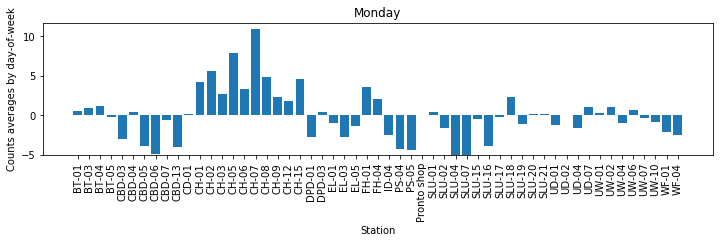

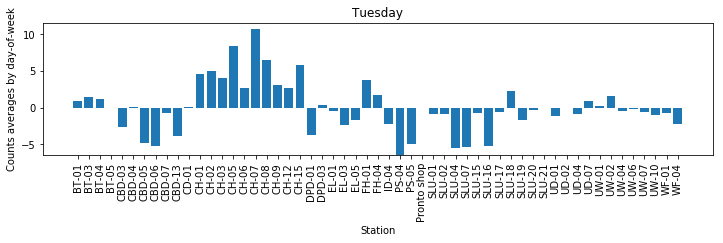

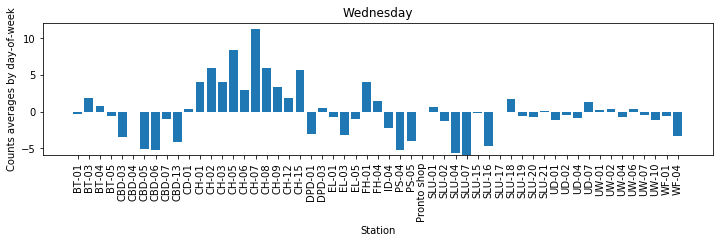

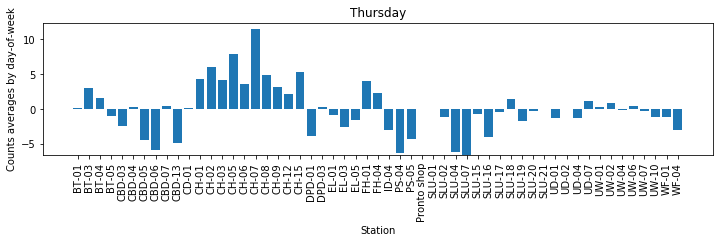

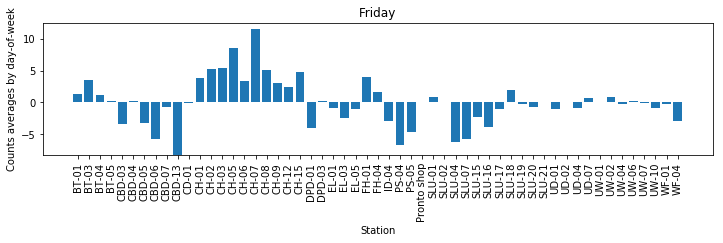

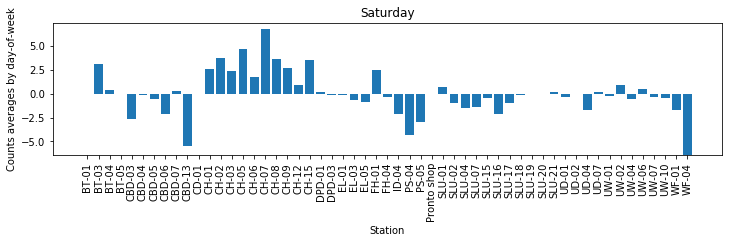

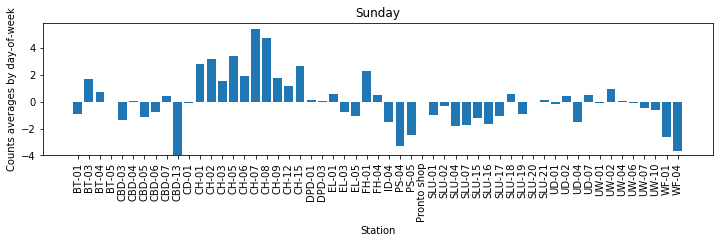

In [95]:
def plot_sub(df):
    n_groups = len(df.index)
    index = np.arange(n_groups) 
    columns = df.columns
    n_columns = len(columns)
    
    for i in range(0 , n_columns):
        fig = plt.figure(figsize=(12, 20))  # Controls global properties of the bar plot
        plt.subplot(n_columns, 1, i+1)
        rects = plt.bar(index,df[columns[i]])
        plt.xticks(index, df.index)
        _, labels = plt.xticks()  # Get the new labels of the plot
        plt.setp(labels, rotation=90)
        plt.xlabel('Station')
        plt.ylabel('Counts averages by day-of-week')
        plt.title(df.columns[i])
        plt.show()
# call function    
plot_sub(dfnew)